# Yield Predection

## <font color='Blue'><b>Part -1 Analysis :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("yield_df.csv")
df

,Sl.no,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [3]:
# Handle missing values
df.dropna(inplace=True)

In [9]:
df.describe(include='all')

,Sl.no,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242,28242,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
unique,NaN,101,10,NaN,NaN,NaN,NaN,NaN
top,NaN,India,Potatoes,NaN,NaN,NaN,NaN,NaN
freq,NaN,4048,4276,NaN,NaN,NaN,NaN,NaN
mean,14120.500000,NaN,NaN,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,NaN,NaN,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,NaN,NaN,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,NaN,NaN,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,NaN,NaN,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,NaN,NaN,2008.000000,104676.750000,1668.00000,48687.880000,26.000000


In [168]:
# Summary statistics
print("Dataset Summary:")
print(df.describe())

Dataset Summary:
              Sl.no          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75%       

In [170]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Sl.no                            0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [172]:
# Unique values in categorical columns
print("\nnumber of countrys:", df['Area'].nunique())
print("types of Items:", df['Item'].nunique())


number of countrys: 101
types of Items: 10


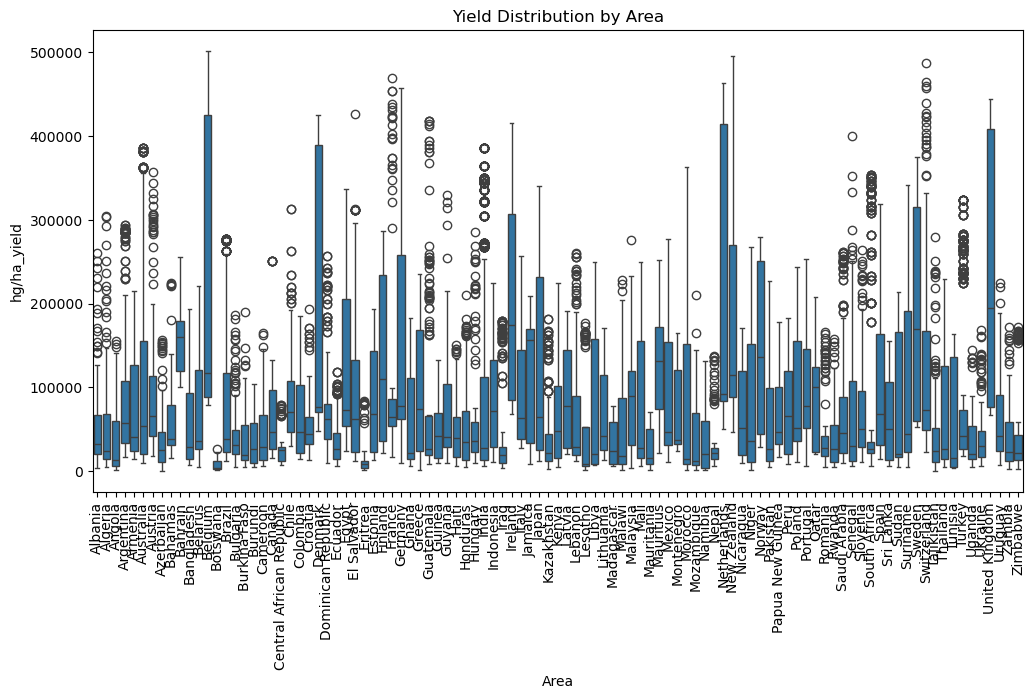

In [174]:
# Yield by Area and Item
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='hg/ha_yield', data=df)
plt.xticks(rotation=90)
plt.title("Yield Distribution by Area")
plt.show()

In [178]:
label_encoders = {}
for col in ['Area', 'Item']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

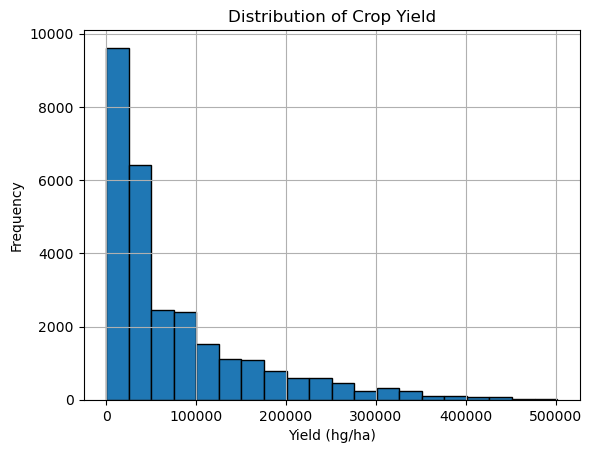

In [180]:
# Distribution of Yield
df['hg/ha_yield'].hist(bins=20, edgecolor='black')
plt.xlabel("Yield (hg/ha)")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()

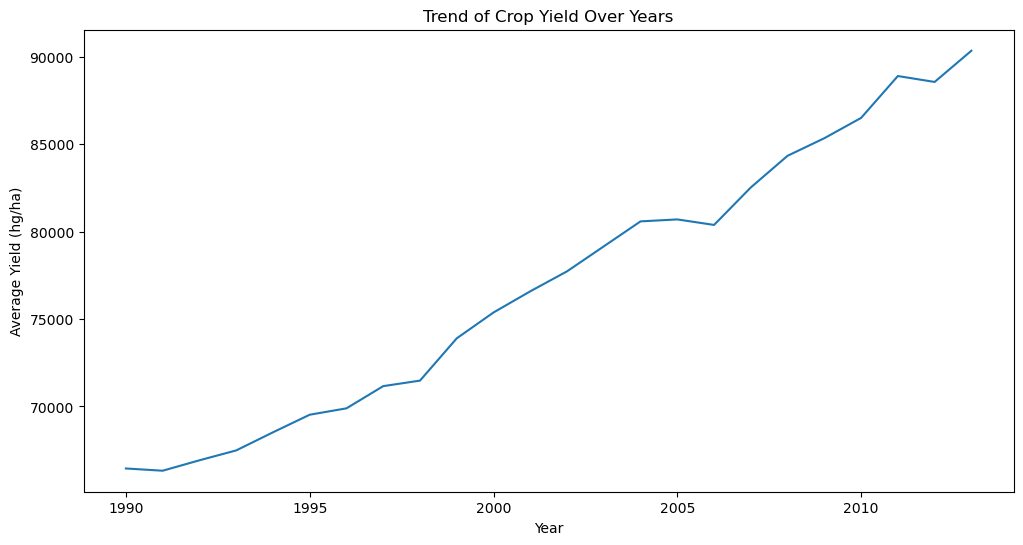

In [182]:
# Average yield per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['hg/ha_yield'], ci=None)
plt.xlabel("Year")
plt.ylabel("Average Yield (hg/ha)")
plt.title("Trend of Crop Yield Over Years")
plt.show()

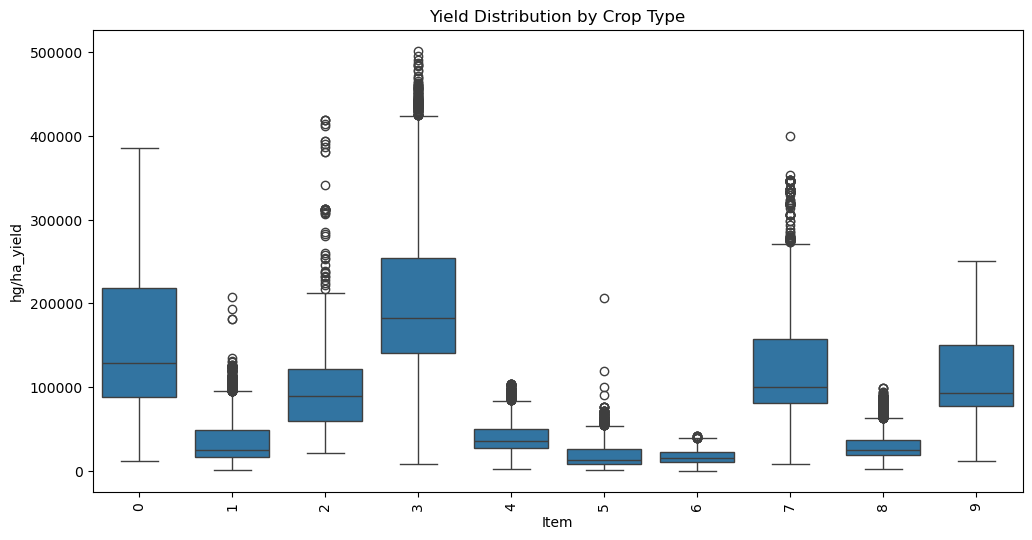

In [184]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='hg/ha_yield', data=df)
plt.xticks(rotation=90)
plt.title("Yield Distribution by Crop Type")
plt.show()


In [185]:
df.drop(columns=['Sl.no'], inplace=True)

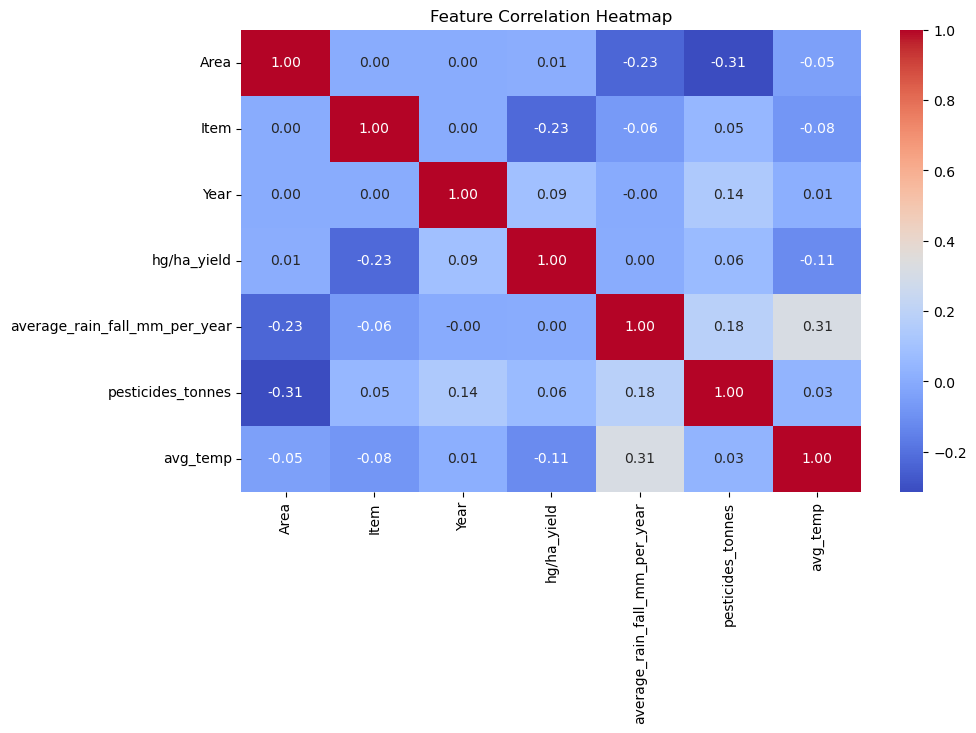

In [186]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Conclusion
- Missing Data was handled by dropping incomplete rows to ensure accuracy.
- Categorical Encoding was applied to Area and Item using Label Encoding.
- Correlation Analysis showed relationships between features affecting yield.
- Yield Distribution varied across regions and crop types, highlighting disparities.
- Trend Analysis indicated fluctuations in yield over the years, possibly due to climate and farming practices.
- Regional & Crop Impact was evident, as different areas and crops had distinct yield patterns.